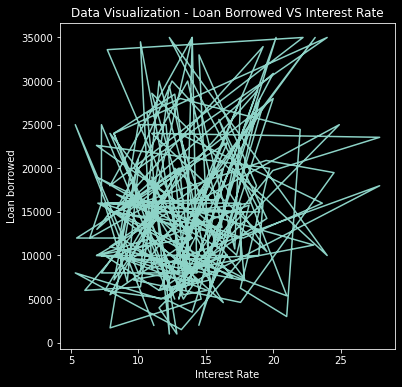

In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.cluster import KMeans
import random

plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (6,6)

data=pd.read_csv("loan2.csv",nrows=200) #Reading first 200 rows of the dataset
y_loan_amount=data["loan_amount"]
x_interest_rate=data["interest_rate"]

plt.xlabel("Interest Rate")
plt.ylabel("Loan borrowed")
plt.title("Data Visualization - Loan Borrowed VS Interest Rate")

plt.plot(x_interest_rate,y_loan_amount)
plt.show()


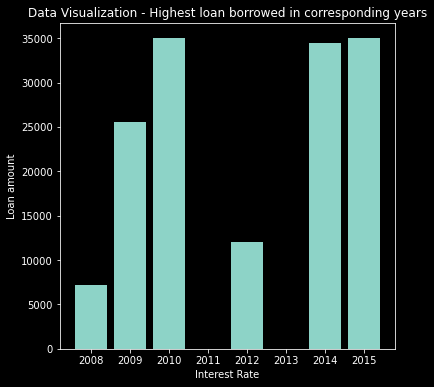

In [2]:
x_year=data["year"]
y_loanamount=data["loan_amount"]
plt.xlabel("Interest Rate")
plt.ylabel("Loan amount")
plt.title("Data Visualization - Highest loan borrowed in corresponding years")
plt.bar(x_year,y_loanamount)
plt.show()




92


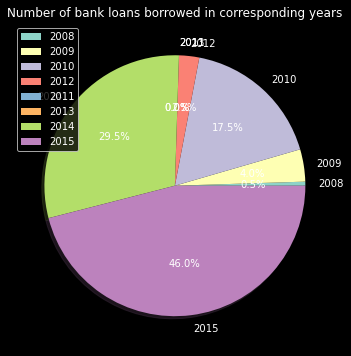

In [3]:

y2008=0   #To calculate number of loans borrowed in 2008
y2009=0   #in 2009
y2010=0   #in 2010
y2011=0   #in 2011
y2012=0   #in 2012
y2013=0   #in 2013
y2014=0   #in 2014
y2015=0   #in 2015

#Counting the number of loans in corresponding years
for index,row in data.iterrows():
    if row[2]==2008:
        y2008=y2008+1
    elif row[2]==2009:
        y2009=y2009+1
    elif row[2]==2010:
        y2010=y2010+1
    elif row[2]==2011:
        y2011=y2011+1
    elif row[2]==2012:
        y2012=y2012+1
    elif row[2]==2013:
        y2013=y2013+1
    elif row[2]==2014:
        y2014=y2014+1
    elif row[2]==2015:
        y2015=y2015+1
print(y2015)
yyears=[y2008,y2009,y2010,y2012,y2011,y2013,y2014,y2015]  
year_labels=["2008","2009","2010","2012","2011","2013","2014","2015"]
plt.pie(yyears,labels=year_labels,shadow=True,autopct="%1.1f%%") 

plt.title("Number of bank loans borrowed in corresponding years")
plt.legend()
plt.show()
     
        


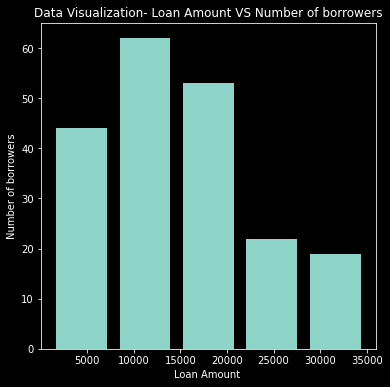

In [4]:
plt.style.use('dark_background')
num_bins=5


plt.hist(y_loanamount,num_bins,histtype="bar",rwidth=0.8)
plt.xlabel("Loan Amount ")
plt.ylabel("Number of borrowers")
plt.title("Data Visualization- Loan Amount VS Number of borrowers")
plt.show()

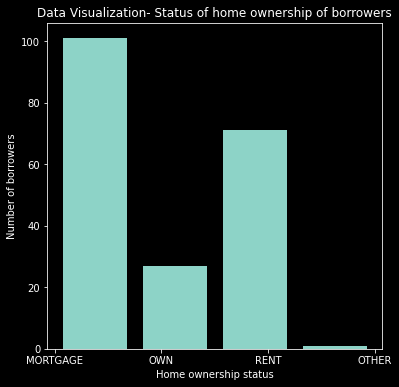

In [5]:
num_bins=4
x_home_ownership=data["home_ownership"]

plt.hist(x_home_ownership,num_bins,histtype="bar",rwidth=0.8)
plt.xlabel("Home ownership status")
plt.ylabel("Number of borrowers")
plt.title("Data Visualization- Status of home ownership of borrowers")
plt.show()

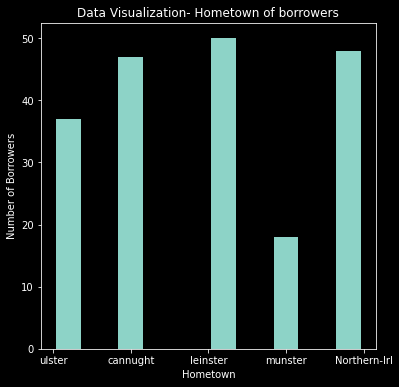

In [6]:
num_bins=10
x_region=data["region"]

plt.hist(x_region,num_bins,histtype="bar",rwidth=0.8)
plt.xlabel("Hometown")
plt.ylabel("Number of Borrowers")
plt.title("Data Visualization- Hometown of borrowers")
plt.show()

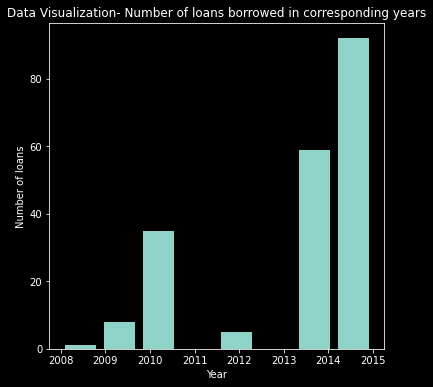

In [7]:
num_bins=8

plt.hist(x_year,num_bins,histtype="bar",rwidth=0.8)
plt.xlabel("Year")
plt.ylabel("Number of loans")
plt.title("Data Visualization- Number of loans borrowed in corresponding years")
plt.show()

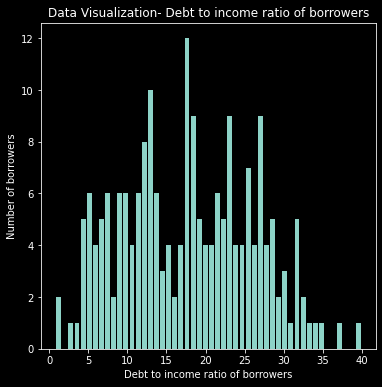

In [8]:
num_bins=50

x_debt_to_income=data["dti"]

plt.hist(x_debt_to_income,num_bins,histtype="bar",rwidth=0.8)
plt.xlabel("Debt to income ratio of borrowers")
plt.ylabel("Number of borrowers")
plt.title("Data Visualization- Debt to income ratio of borrowers")
plt.show()

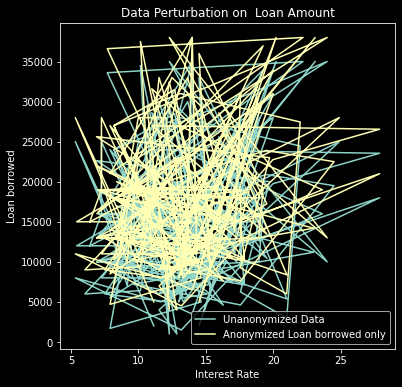

In [9]:
#Data Perturbation-Added 3000 to loan_amount
#Only anonymizing loan amount



anonymize_loan_amount=data["loan_amount"]+3000    #Added noise by adding 3000 units to loan amount

data["anonymized_loan_amount"]=anonymize_loan_amount #Anonymized loan amount
y_loan_amount=data["loan_amount"]
x_interest_rate=data["interest_rate"]





plt.xlabel("Interest Rate")
plt.ylabel("Loan borrowed")
plt.title("Data Perturbation on  Loan Amount")


plt.plot(x_interest_rate,y_loan_amount,label="Unanonymized Data")
plt.plot(x_interest_rate,anonymize_loan_amount,label="Anonymized Loan borrowed only")


plt.legend()
plt.show()

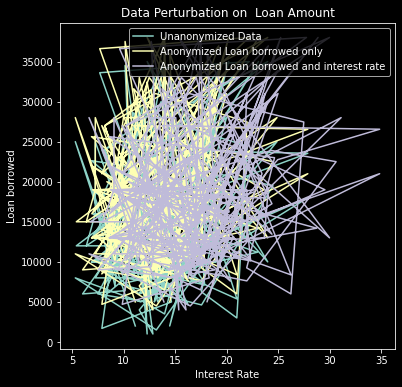

In [10]:
#Data perturbation with both loan borrowed and interest rate anonymized


anonymize_interest_rate=data["interest_rate"]*1.25         #Added noise by multiplying interest rate by 1.25
data["anonymized_interest_rate"]=anonymize_interest_rate   #Anonymized interest rate

plt.xlabel("Interest Rate")
plt.ylabel("Loan borrowed")
plt.title("Data Perturbation on  Loan Amount")


plt.plot(x_interest_rate,y_loan_amount,label="Unanonymized Data")
plt.plot(x_interest_rate,anonymize_loan_amount,label="Anonymized Loan borrowed only")
plt.plot(anonymize_interest_rate,anonymize_loan_amount,label="Anonymized Loan borrowed and interest rate")

plt.legend()
plt.show()



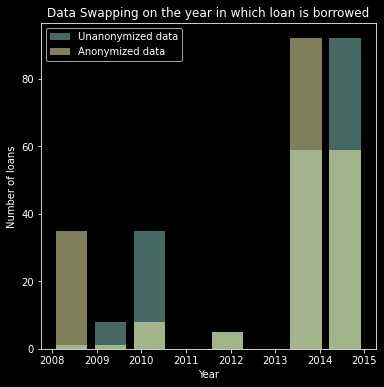

In [11]:
#Data Shuffling/ Data Swapping with the year in which loan borrowed is swapped


data["year2"] = 0    #Swapped years
data.to_csv("loan2.csv", index=False)


#Swapping years
for i,row in data.iterrows():
    if row[2]==2008:
        data.at[i,'year2'] =2009
    elif row[2]==2009:
        data.at[i,'year2']=2010
    elif row[2]==2010:
        data.at[i,'year2']=2008
    elif row[2]==2011:
        data.at[i,'year2']=2013
    elif row[2]==2012:
        data.at[i,'year2']=2012
    elif row[2]==2013:
        data.at[i,'year2']=2009
    elif row[2]==2014:
        data.at[i,'year2']=2015
    elif row[2]==2015:
        data.at[i,'year2']=2014
        
num_bins=8
x_year2=data["year2"]
plt.hist(x_year,num_bins,histtype="bar",rwidth=0.8,label="Unanonymized data",alpha=0.5)
plt.hist(x_year2,num_bins,histtype="bar",rwidth=0.8,label="Anonymized data",alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Number of loans")
plt.title("Data Swapping on the year in which loan is borrowed")
plt.legend()
plt.show()

        

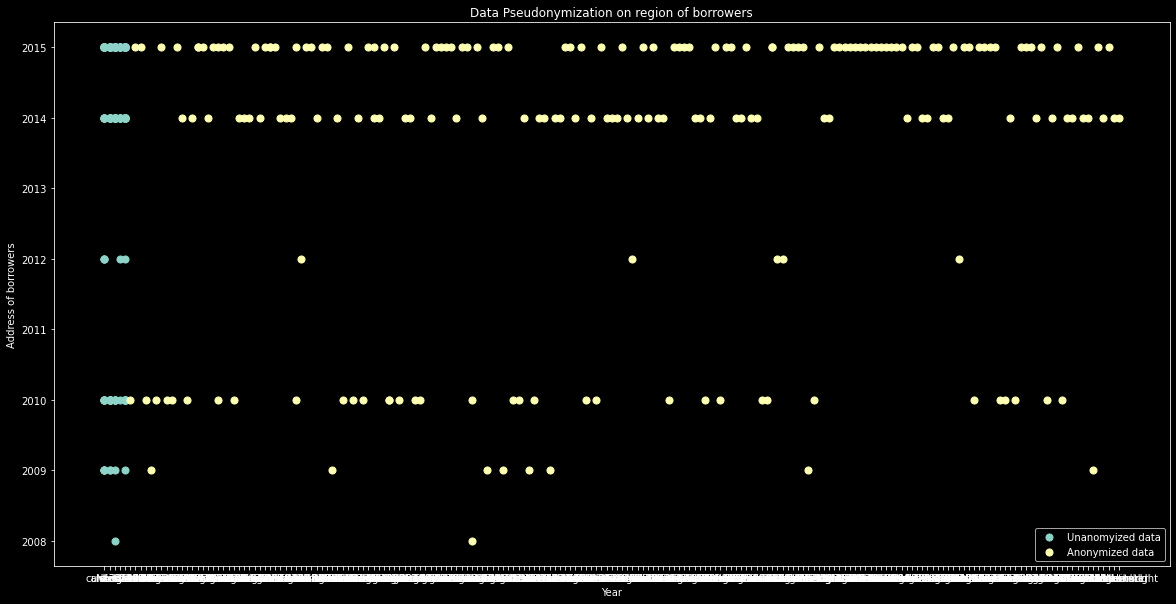

In [12]:
#Pseudonymization-  In the original dataset the region of the borrowers is specified. We have pseudonymized the data 
                   #by adding random house numbers 
                   #Note the original information is still preserved and the data can still be used for analytics 
                   #No structural information loss

plt.rcParams["figure.figsize"] = (20,10)

data["region2"] = "a"         #For fake addresses
data.to_csv("loan2.csv", index=False)
li=[]
for i in range(0,500):
    li.append(i)    #Now li contains 1 to 500 digits
f=1
for i,row in data.iterrows():
    #value = random.randint(1,100) 
    if f==1:
        shuffle(li)   #Shuffle the list
        z=random.sample(li,1)  #Pick up 1 random element from the list
        n=z[0] #Picking up 1 element 
       # print(n) #Random house number to be added to the region
    data.at[i,'region2']="#"+str(n)+" "+data.at[i,'region'] #Assigning house numbers 
    #Region2 is the anonymized column
#print(data["region2"])
x_year=data["year"]
y_region2=data["region2"]




plt.scatter(x_region,x_year,s=50,label="Unanomyized data")
plt.scatter(y_region2,x_year,s=50,label="Anonymized data")
plt.xlabel("Year")
plt.ylabel("Address of borrowers")
plt.title("Data Pseudonymization on region of borrowers")
plt.legend()
plt.show()

#The x axis represents the full address (eg #101 canught, #368 ulster) plotted on it for 200 borrowers, and hence the labels
#are not clear


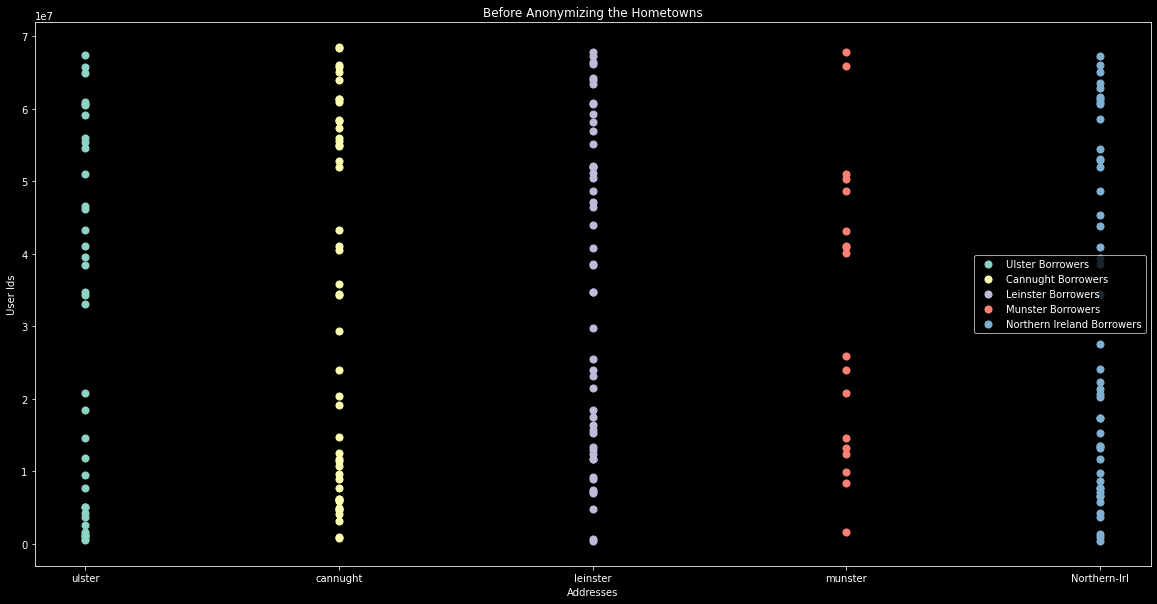

In [13]:
#Userid and region

x_leinster=[]
y_leinsterid=[]
x_ulster=[]
y_ulsterid=[]
x_cannught=[]
y_cannughtid=[]
x_munster=[]
y_munsterid=[]
x_NorthernIrl=[]
y_NorthernIrlid=[]
for i,row in data.iterrows():
    if data.at[i,"region"]=="leinster":
        x_leinster.append(data.at[i,"region"])   #Segregating data region wise
        y_leinsterid.append(data.at[i,"id"])
    if data.at[i,"region"]=="ulster":
        x_ulster.append(data.at[i,"region"])   
        y_ulsterid.append(data.at[i,"id"])
    if data.at[i,"region"]=="cannught":
        x_cannught.append(data.at[i,"region"])   
        y_cannughtid.append(data.at[i,"id"])
    if data.at[i,"region"]=="munster":
        x_munster.append(data.at[i,"region"])   
        y_munsterid.append(data.at[i,"id"])
    if data.at[i,"region"]=="Northern-Irl":
        x_NorthernIrl.append(data.at[i,"region"])   
        y_NorthernIrlid.append(data.at[i,"id"])
        
      
        
plt.scatter(x_ulster,y_ulsterid,s=50,label="Ulster Borrowers")
plt.scatter(x_cannught,y_cannughtid,s=50,label="Cannught Borrowers")
plt.scatter(x_leinster,y_leinsterid,s=50,label="Leinster Borrowers")
plt.scatter(x_munster,y_munsterid,s=50,label="Munster Borrowers")
plt.scatter(x_NorthernIrl,y_NorthernIrlid,s=50,label="Northern Ireland Borrowers")
plt.title("Before Anonymizing the Hometowns")
plt.xlabel("Addresses")
plt.ylabel("User Ids")
plt.legend()
plt.show()


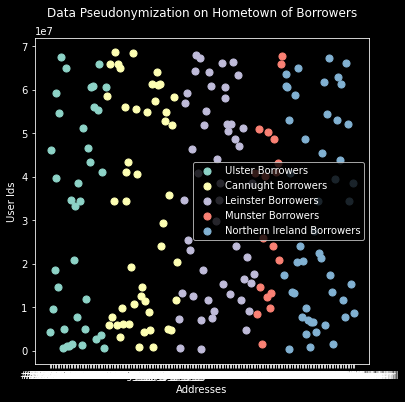

In [14]:
#Userid and region
plt.rcParams["figure.figsize"] = (6,6)
x_leinster=[]
y_leinsterid=[]
x_ulster=[]
y_ulsterid=[]
x_cannught=[]
y_cannughtid=[]
x_munster=[]
y_munsterid=[]
x_NorthernIrl=[]
y_NorthernIrlid=[]
for i,row in data.iterrows():
    if data.at[i,"region"]=="leinster":
        x_leinster.append(data.at[i,"region2"])   #Segregating pseudonymized data
        y_leinsterid.append(data.at[i,"id"])
    if data.at[i,"region"]=="ulster":
        x_ulster.append(data.at[i,"region2"])  
        y_ulsterid.append(data.at[i,"id"])
    if data.at[i,"region"]=="cannught":
        x_cannught.append(data.at[i,"region2"])   
        y_cannughtid.append(data.at[i,"id"])
    if data.at[i,"region"]=="munster":
        x_munster.append(data.at[i,"region2"])   
        y_munsterid.append(data.at[i,"id"])
    if data.at[i,"region"]=="Northern-Irl":
        x_NorthernIrl.append(data.at[i,"region2"])   
        y_NorthernIrlid.append(data.at[i,"id"])
        
      
        
plt.scatter(x_ulster,y_ulsterid,s=50,label="Ulster Borrowers")
plt.scatter(x_cannught,y_cannughtid,s=50,label="Cannught Borrowers")
plt.scatter(x_leinster,y_leinsterid,s=50,label="Leinster Borrowers")
plt.scatter(x_munster,y_munsterid,s=50,label="Munster Borrowers")
plt.scatter(x_NorthernIrl,y_NorthernIrlid,s=50,label="Northern Ireland Borrowers")
plt.title("Data Pseudonymization on Hometown of Borrowers\n")
plt.xlabel("Addresses")
plt.ylabel("User Ids")
plt.legend()
plt.show()


In [15]:
#k-anonymization
#Here we have achieved k-anonymization by the technique generalization
#While creating the dataset we genralise the data for the following columns:
#home_ownership (1,2,3), annual_income (1,2,3), loan_condition (0,1), term (1,2)
#All the above columns contain sensitive data that can be generalised and the tuples alongside contain the generalized data

#Below we prepare data for clusters:
#Now that for k anonymization we have made decision about which columns to consider
#Number of diff. categories: 3*3*2*2=36
data["score"] = 0
data.to_csv("loan2.csv", index=False)
i=1
array=[0,1,2,3]
for i,rows in data.iterrows():
    if data.at[i,"home_ownership_cat"]==1:
        if data.at[i,"income_cat"]==1:
            if data.at[i,"loan_condition_cat"]==0:
                if data.at[i,"term_cat"]==1:
                    data.at[i,"score"]=1
                    
    if data.at[i,"home_ownership_cat"]==1:
        if data.at[i,"income_cat"]==1:
            if data.at[i,"loan_condition_cat"]==0:
                if data.at[i,"term_cat"]==2:
                    data.at[i,"score"]=2
                    
    if data.at[i,"home_ownership_cat"]==1:
        if data.at[i,"income_cat"]==1:
            if data.at[i,"loan_condition_cat"]==1:
                if data.at[i,"term_cat"]==1:
                    data.at[i,"score"]=3
                    
    if data.at[i,"home_ownership_cat"]==1:
        if data.at[i,"income_cat"]==1:
            if data.at[i,"loan_condition_cat"]==1:
                if data.at[i,"term_cat"]==2:
                    data.at[i,"score"]=4
                    
    if data.at[i,"home_ownership_cat"]==1:
        if data.at[i,"income_cat"]==2:
            if data.at[i,"loan_condition_cat"]==0:
                if data.at[i,"term_cat"]==1:
                    data.at[i,"score"]=5
                    
    if data.at[i,"home_ownership_cat"]==1:
        if data.at[i,"income_cat"]==2:
            if data.at[i,"loan_condition_cat"]==0:
                if data.at[i,"term_cat"]==2:
                    data.at[i,"score"]=6
                    
    if data.at[i,"home_ownership_cat"]==1:
        if data.at[i,"income_cat"]==2:
            if data.at[i,"loan_condition_cat"]==1:
                if data.at[i,"term_cat"]==2:
                    data.at[i,"score"]=7
                    
    if data.at[i,"home_ownership_cat"]==1:
        if data.at[i,"income_cat"]==2:
            if data.at[i,"loan_condition_cat"]==1:
                if data.at[i,"term_cat"]==2:
                    data.at[i,"score"]=8
                    
    if data.at[i,"home_ownership_cat"]==1:
        if data.at[i,"income_cat"]==3:
            if data.at[i,"loan_condition_cat"]==0:
                if data.at[i,"term_cat"]==1:
                    data.at[i,"score"]=9
                    
    if data.at[i,"home_ownership_cat"]==1:
        if data.at[i,"income_cat"]==3:
            if data.at[i,"loan_condition_cat"]==0:
                if data.at[i,"term_cat"]==2:
                    data.at[i,"score"]=10
                    
    if data.at[i,"home_ownership_cat"]==1:
        if data.at[i,"income_cat"]==3:
            if data.at[i,"loan_condition_cat"]==1:
                if data.at[i,"term_cat"]==1:
                    data.at[i,"score"]=11
                    
    if data.at[i,"home_ownership_cat"]==1:
        if data.at[i,"income_cat"]==3:
            if data.at[i,"loan_condition_cat"]==1:
                if data.at[i,"term_cat"]==2:
                    data.at[i,"score"]=12
        
    if data.at[i,"home_ownership_cat"]==2:
        if data.at[i,"income_cat"]==1:
            if data.at[i,"loan_condition_cat"]==0:
                if data.at[i,"term_cat"]==1:
                    data.at[i,"score"]=13
                    
    if data.at[i,"home_ownership_cat"]==2:
        if data.at[i,"income_cat"]==1:
            if data.at[i,"loan_condition_cat"]==0:
                if data.at[i,"term_cat"]==2:
                    data.at[i,"score"]=14
                    
    if data.at[i,"home_ownership_cat"]==2:
        if data.at[i,"income_cat"]==1:
            if data.at[i,"loan_condition_cat"]==1:
                if data.at[i,"term_cat"]==1:
                    data.at[i,"score"]=15
                    
    if data.at[i,"home_ownership_cat"]==2:
        if data.at[i,"income_cat"]==1:
            if data.at[i,"loan_condition_cat"]==1:
                if data.at[i,"term_cat"]==2:
                    data.at[i,"score"]=16
                    
    if data.at[i,"home_ownership_cat"]==2:
        if data.at[i,"income_cat"]==2:
            if data.at[i,"loan_condition_cat"]==0:
                if data.at[i,"term_cat"]==1:
                    data.at[i,"score"]=17
                    
    if data.at[i,"home_ownership_cat"]==2:
        if data.at[i,"income_cat"]==2:
            if data.at[i,"loan_condition_cat"]==0:
                if data.at[i,"term_cat"]==2:
                    data.at[i,"score"]=18
                    
    if data.at[i,"home_ownership_cat"]==2:
        if data.at[i,"income_cat"]==2:
            if data.at[i,"loan_condition_cat"]==1:
                if data.at[i,"term_cat"]==2:
                    data.at[i,"score"]=19
                    
    if data.at[i,"home_ownership_cat"]==2:
        if data.at[i,"income_cat"]==2:
            if data.at[i,"loan_condition_cat"]==1:
                if data.at[i,"term_cat"]==2:
                    data.at[i,"score"]=20
                    
    if data.at[i,"home_ownership_cat"]==2:
        if data.at[i,"income_cat"]==3:
            if data.at[i,"loan_condition_cat"]==0:
                if data.at[i,"term_cat"]==1:
                    data.at[i,"score"]=21
                    
    if data.at[i,"home_ownership_cat"]==2:
        if data.at[i,"income_cat"]==3:
            if data.at[i,"loan_condition_cat"]==0:
                if data.at[i,"term_cat"]==2:
                    data.at[i,"score"]=22
                    
    if data.at[i,"home_ownership_cat"]==2:
        if data.at[i,"income_cat"]==3:
            if data.at[i,"loan_condition_cat"]==1:
                if data.at[i,"term_cat"]==1:
                    data.at[i,"score"]=23
                    
    if data.at[i,"home_ownership_cat"]==2:
        if data.at[i,"income_cat"]==3:
            if data.at[i,"loan_condition_cat"]==1:
                if data.at[i,"term_cat"]==2:
                    data.at[i,"score"]=24
                    
    if data.at[i,"home_ownership_cat"]==3:
        if data.at[i,"income_cat"]==1:
            if data.at[i,"loan_condition_cat"]==0:
                if data.at[i,"term_cat"]==1:
                    data.at[i,"score"]=25
                    
    if data.at[i,"home_ownership_cat"]==3:
        if data.at[i,"income_cat"]==1:
            if data.at[i,"loan_condition_cat"]==0:
                if data.at[i,"term_cat"]==2:
                    data.at[i,"score"]=26
                    
    if data.at[i,"home_ownership_cat"]==3:
        if data.at[i,"income_cat"]==1:
            if data.at[i,"loan_condition_cat"]==1:
                if data.at[i,"term_cat"]==1:
                    data.at[i,"score"]=27
                    
    if data.at[i,"home_ownership_cat"]==3:
        if data.at[i,"income_cat"]==1:
            if data.at[i,"loan_condition_cat"]==1:
                if data.at[i,"term_cat"]==2:
                    data.at[i,"score"]=28
                    
    if data.at[i,"home_ownership_cat"]==3:
        if data.at[i,"income_cat"]==2:
            if data.at[i,"loan_condition_cat"]==0:
                if data.at[i,"term_cat"]==1:
                    data.at[i,"score"]=29
                    
    if data.at[i,"home_ownership_cat"]==3:
        if data.at[i,"income_cat"]==2:
            if data.at[i,"loan_condition_cat"]==0:
                if data.at[i,"term_cat"]==2:
                    data.at[i,"score"]=30
                    
    if data.at[i,"home_ownership_cat"]==3:
        if data.at[i,"income_cat"]==2:
            if data.at[i,"loan_condition_cat"]==1:
                if data.at[i,"term_cat"]==2:
                    data.at[i,"score"]=31
                    
    if data.at[i,"home_ownership_cat"]==3:
        if data.at[i,"income_cat"]==2:
            if data.at[i,"loan_condition_cat"]==1:
                if data.at[i,"term_cat"]==2:
                    data.at[i,"score"]=32
                    
    if data.at[i,"home_ownership_cat"]==3:
        if data.at[i,"income_cat"]==3:
            if data.at[i,"loan_condition_cat"]==0:
                if data.at[i,"term_cat"]==1:
                    data.at[i,"score"]=33
                    
    if data.at[i,"home_ownership_cat"]==3:
        if data.at[i,"income_cat"]==3:
            if data.at[i,"loan_condition_cat"]==0:
                if data.at[i,"term_cat"]==2:
                    data.at[i,"score"]=34
                    
    if data.at[i,"home_ownership_cat"]==3:
        if data.at[i,"income_cat"]==3:
            if data.at[i,"loan_condition_cat"]==1:
                if data.at[i,"term_cat"]==1:
                    data.at[i,"score"]=35
                    
    if data.at[i,"home_ownership_cat"]==3:
        if data.at[i,"income_cat"]==3:
            if data.at[i,"loan_condition_cat"]==1:
                if data.at[i,"term_cat"]==2:
                    data.at[i,"score"]=36

               
        
#The above assigns a score for clustering
        

        





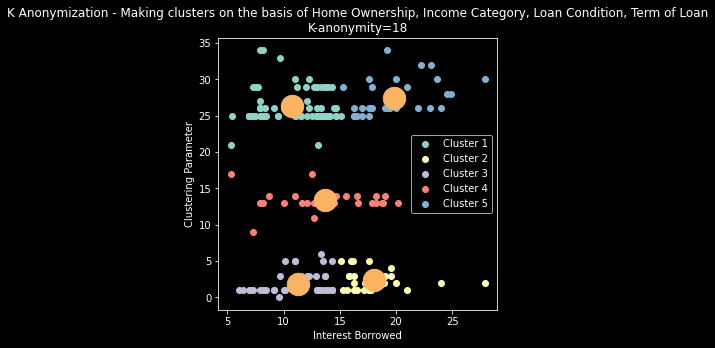

In [16]:
X=data.loc[:, ["interest_rate","score"]] #Selects the data on which clusters have to be made

plt.rcParams["figure.figsize"] = (5,5)
kmeans 
0)
pred = kmeans.fit_predict(X) #As number of clusters are 5, The values by this prediction are in range 0-4
#print(pred_y)

data["prediction"] = 0
data.to_csv("loan2.csv", index=False)
data["prediction"]=pred

x_0=[] #For each cluster - each value of prediction in pred #Cluster1 #x-axis
x_1=[] #Cluster2
x_2=[] #Cluster3
x_3=[] #Cluster4
x_4=[] #Cluster5
x_5=[] #Cluster1 #y axis
y_0=[]
y_1=[]
y_2=[]
y_3=[]
y_4=[]

for i,row in data.iterrows():
    if data.at[i,"prediction"]==0:
        y_0.append(data.at[i,"score"])
        x_0.append(data.at[i,"interest_rate"])
    if data.at[i,"prediction"]==1:
        y_1.append(data.at[i,"score"])
        x_1.append(data.at[i,"interest_rate"])
    if data.at[i,"prediction"]==2:
        y_2.append(data.at[i,"score"])
        x_2.append(data.at[i,"interest_rate"])
    if data.at[i,"prediction"]==3:
        y_3.append(data.at[i,"score"])
        x_3.append(data.at[i,"interest_rate"])
    if data.at[i,"prediction"]==4:
        y_4.append(data.at[i,"score"])
        x_4.append(data.at[i,"interest_rate"])
        
plt.scatter(x_0,y_0,label="Cluster 1")
plt.scatter(x_1,y_1,label="Cluster 2")
plt.scatter(x_2,y_2,label="Cluster 3")
plt.scatter(x_3,y_3,label="Cluster 4")
plt.scatter(x_4,y_4,label="Cluster 5")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=500)
plt.xlabel("Interest Borrowed")
plt.ylabel("Clustering Parameter")
plt.title("K Anonymization - Making clusters on the basis of Home Ownership, Income Category, Loan Condition, Term of Loan\nK-anonymity=18")
plt.legend()
plt.show()

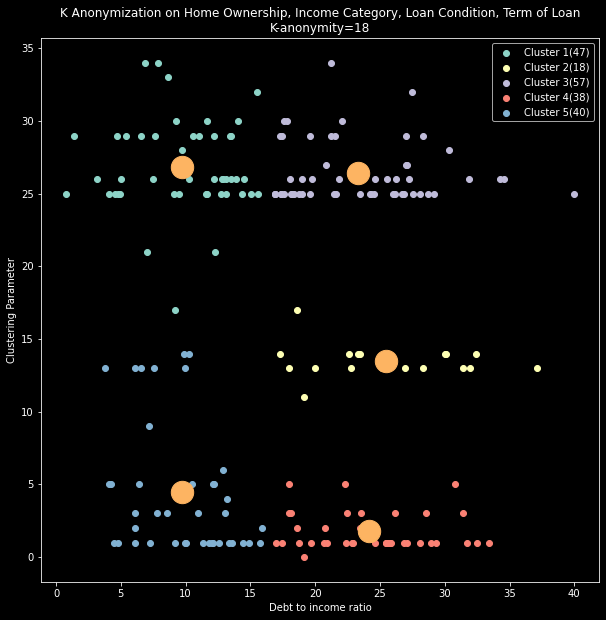

In [17]:
X=data.loc[:, ["dti","score"]]#Selects the data on which clusters have to be made

plt.rcParams["figure.figsize"] = (10,10)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred = kmeans.fit_predict(X)
#print(pred_y)

data["prediction"] = 0
data.to_csv("loan2.csv", index=False)
data["prediction"]=pred

x_0=[]
x_1=[]
x_2=[]
x_3=[]
x_4=[]
x_5=[]
y_0=[]
y_1=[]
y_2=[]
y_3=[]
y_4=[]

for i,row in data.iterrows():
    if data.at[i,"prediction"]==0:
        y_0.append(data.at[i,"score"])
        x_0.append(data.at[i,"dti"])
    if data.at[i,"prediction"]==1:
        y_1.append(data.at[i,"score"])
        x_1.append(data.at[i,"dti"])
    if data.at[i,"prediction"]==2:
        y_2.append(data.at[i,"score"])
        x_2.append(data.at[i,"dti"])
    if data.at[i,"prediction"]==3:
        y_3.append(data.at[i,"score"])
        x_3.append(data.at[i,"dti"])
    if data.at[i,"prediction"]==4:
        y_4.append(data.at[i,"score"])
        x_4.append(data.at[i,"dti"])
      
plt.scatter(x_0,y_0,label="Cluster 1(47)")
plt.scatter(x_1,y_1,label="Cluster 2(18)")
plt.scatter(x_2,y_2,label="Cluster 3(57)")
plt.scatter(x_3,y_3,label="Cluster 4(38)")
plt.scatter(x_4,y_4,label="Cluster 5(40)")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=500)
plt.xlabel("Debt to income ratio")
plt.ylabel("Clustering Parameter")
plt.title("K Anonymization on Home Ownership, Income Category, Loan Condition, Term of Loan\nK-anonymity=18")
plt.legend()
plt.show()